In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
reduced_data = data[-100:]  # Reduce data points for candlestick chart
mpf.plot(reduced_data, type='candle', style='charles', title='Candlestick Chart')

NameError: name 'data' is not defined

In [ ]:
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


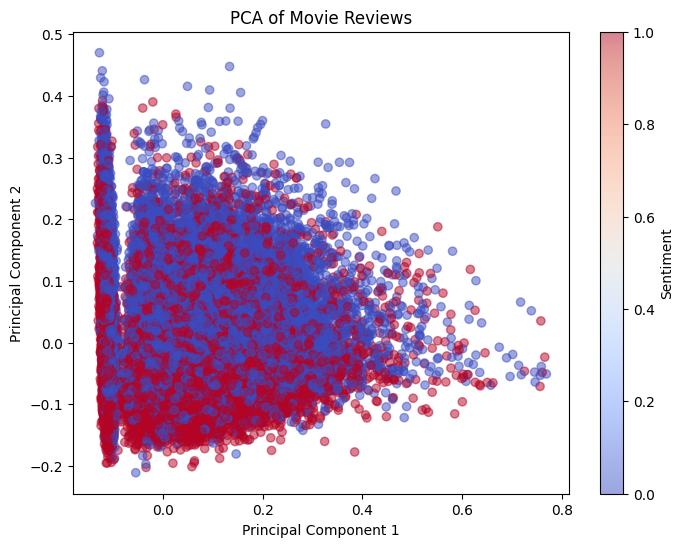

Confusion Matrix:
[[4308  653]
 [ 507 4532]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

No content available for positive reviews.
No content available for negative reviews.


<Figure size 1200x600 with 0 Axes>

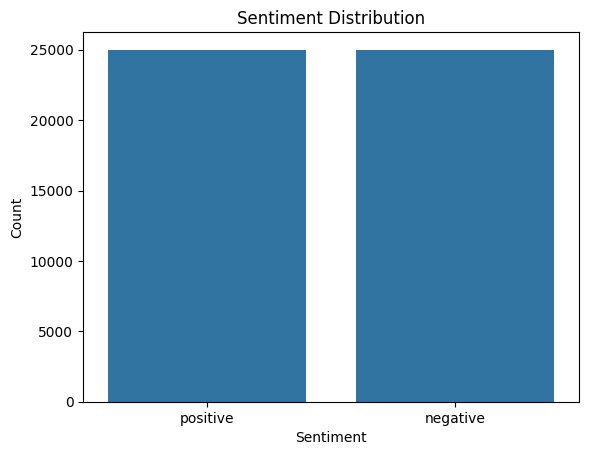

In [ ]:

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)
    # Preprocess the text data
df['cleaned_review'] = df['review'].apply(preprocess_text)



# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()



# Encode sentiment labels
encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA of Movie Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Sentiment')
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])

plt.figure(figsize=(12, 6))

if len(positive_reviews.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_reviews), interpolation='bilinear')
    plt.title('Positive Reviews')
    plt.axis('off')
else:
    print("No content available for positive reviews.")

if len(negative_reviews.strip()) > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_reviews), interpolation='bilinear')
    plt.title('Negative Reviews')
    plt.axis('off')
else:
    print("No content available for negative reviews.")

plt.show()

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
